In [18]:

# What is Bias? What is Variance?

# Bias is the difference between the Predicted Value and the Expected Value. 
# This is the inability of a machine learning model to capture the true relationship between the data variables. 
# It is caused by the erroneous assumptions that are inherent to the learning algorithm.

# Variance is when the model takes into account the fluctuations in the data, i.e. the noise as well. 
# This is nothing but the concept of the model overfitting on a particular dataset. If the model learns to fit very 
# closely to the points on a particular dataset, when it used to predict on another dataset it may not predict 
# as accurately as it did in the first.

# The primary aim of the Machine Learning model is to learn from the given data and generate predictions based on the 
# pattern observed during the learning process. However, our task doesn’t end there. We need to continuously make 
# improvements to the models, based on the kind of results it generates.


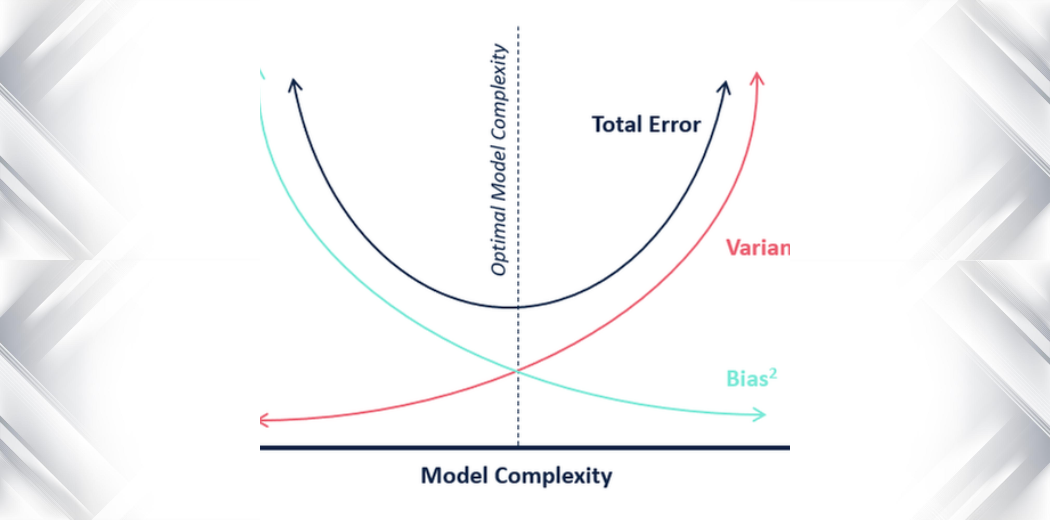

In [17]:

from IPython.display import Image
Image(filename='C:/Users/Bias and Variance/2.png', width=600)


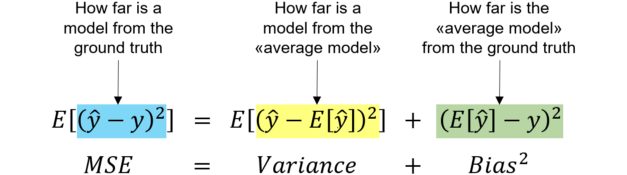

In [19]:

Image(filename='C:/Users/Bias and Variance/2.png', width=600)


In [7]:

#This library is used to decompose bias and variance in our models
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
import warnings
warnings.filterwarnings('ignore')
#We will load the Boston house dataset for our example
from sklearn.datasets import load_boston
from sklearn import metrics
# From the library load the necessary rows & columns
X, y = load_boston(return_X_y=True)
# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Model definition
model_lr = LinearRegression()

# Estimation of bias and variance using bias_variance_decomp 
#Note here we are using loss as 'mse' and setting default bootstrap num_rounds to 200
mse, bias, var = bias_variance_decomp(model_lr, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)
y_pred=model_lr.predict(X_test)

# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred))


MSE from bias_variance lib [avg expected loss]: 22.128
Avg Bias: 20.522
Avg Variance: 1.606
Mean Square error by Sckit-learn lib: 22.069


In [2]:

# After pruning — Use LASSO
from sklearn.linear_model import LinearRegression, Lasso
lasso_model = Lasso(alpha=0.05)
error_reg_las, bias_reg_las, var_reg_las = bias_variance_decomp(lasso_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_reg_las)
print('Avg Bias: %.3f' % bias_reg_las)
print('Avg Variance: %.3f' % var_reg_las)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred))



MSE from bias_variance lib [avg expected loss]: 22.154
Avg Bias: 20.508
Avg Variance: 1.646
Mean Square error by Sckit-learn lib: 22.069


In [3]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Reading the Iris.csv file
data = load_iris()

# Extracting Attributes / Features
X = data.data

# Extracting Target / Class Labels
y = data.target

# Import Library for splitting data
from sklearn.model_selection import train_test_split

# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


Train data accuracy: 1.0
Test data accuracy: 0.9473684210526315


In [4]:

# Pruning has some effect over the reduction in variance.
# After Pruning...
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss

clf_RF = DecisionTreeClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train,y_train)
y_pred=clf_RF.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_RF, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))


Average expected loss: 0.056
Average bias: 0.053
Average variance: 0.024
Sklearn 0-1 loss: 0.053


In [5]:

# It is usually known that KNN model with low k-values usually has high variance & 
# low bias but as the k increases the variance decreases and bias increases.
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)
y_pred=clf_knn.predict(X_test)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_knn, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))


Average expected loss: 0.059
Average bias: 0.053
Average variance: 0.038
Sklearn 0-1 loss: 0.053


Average expected loss 0.057368421052631575
Average bias 0.05263157894736842
Average variance 0.024999999999999998
Average expected loss 0.0525
Average bias 0.05263157894736842
Average variance 0.02697368421052632
Average expected loss 0.05894736842105263
Average bias 0.05263157894736842
Average variance 0.037631578947368426
Average expected loss 0.04947368421052631
Average bias 0.02631578947368421
Average variance 0.038421052631578946
Average expected loss 0.05671052631578947
Average bias 0.05263157894736842
Average variance 0.03486842105263157
Average expected loss 0.04473684210526315
Average bias 0.05263157894736842
Average variance 0.03736842105263158
Average expected loss 0.05118421052631579
Average bias 0.05263157894736842
Average variance 0.03118421052631579
Average expected loss 0.04276315789473684
Average bias 0.05263157894736842
Average variance 0.033026315789473674
Average expected loss 0.04855263157894736
Average bias 0.05263157894736842
Average variance 0.028289473684210524

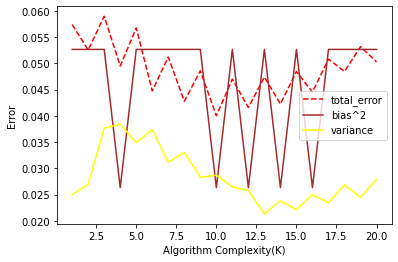

In [6]:

bias_KnnClass, var_KnnClass,error_KnnClass, = [], [], []
for k in range(1,21):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
    print(f"Average expected loss {avg_expected_loss}")
    print(f"Average bias {avg_bias}")
    print(f"Average variance {avg_var}")
plt.plot(range(1,21), error_KnnClass, 'red', label = 'total_error',linestyle='dashed')
plt.plot(range(1,21), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(1,21), var_KnnClass, 'yellow', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()
